In [1]:
import numpy as np
import scipy
import math
from scipy import integrate 
import matplotlib.pyplot as plt
from __future__ import division
from scipy import optimize

For a finite square well potential with a depth of $V_0$ and size a, the bound energy levels $E_n$ for a particle of mass m are determined by solving the transcendental equation $$tan(z) = 􏰀((z_{0}/z)^{2} − 1)^{1/2} $$ where $$z = (a􏰀/h)(2m(E+V_{0}))^{1/2}$$ and $$z_{0} = (a􏰀/h)(2m(V_{0}))^{1/2}$$
We write a routine to solve for all possible values of $z$ given $z_{0}$. We list all the energy levels (in units of eV) for a proton in a 1D box with length $a = 10^{−10} m$ and depth $V_{0} = 10 meV$.

In [3]:
def eqnLHS(z):
    return np.tan(z)
    

def eqnRHS(z):
    part = z_0 / z
    part = part * part
    return math.sqrt(part - 1)

def F(z): #should be 0
    return (eqnLHS(z) - eqnRHS(z))

z = 0.1
z_0 = 3

In [5]:
x_range = np.arange(0.0001, 1.9999, 0.001)
eqnLeft = np.zeros(len(x_range))
eqnRight = np.zeros(len(x_range))
for i in range(0, len(x_range)):
    eqnLeft[i] = eqnLHS(x_range[i])
    eqnRight[i] = eqnRHS(x_range[i])

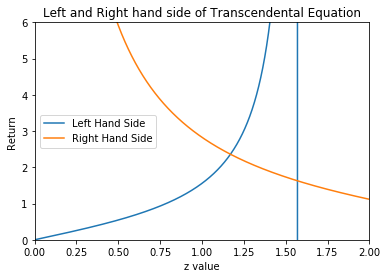

In [6]:
plt.title('Left and Right hand side of Transcendental Equation')
plt.xlabel('z value')
plt.ylabel('Return')
plt.plot(x_range, eqnLeft, label='Left Hand Side' )
plt.plot(x_range, eqnRight, label='Right Hand Side')
plt.ylim(0, 6)
plt.xlim(0, 2)
plt.legend()
plt.show()

In our range, the functions intersect once. This behavior will repeat continuously depending on our equation. So we find the intersection present. We plot the function equal to 0 and look for where the function is equal to 0 to find the intersection points.

In [8]:
x_range = np.arange(0.0001, 1.999, 0.001)
returns = np.zeros(len(x_range))

for i in range(0, len(x_range)):
    returns[i] = F(x_range[i])

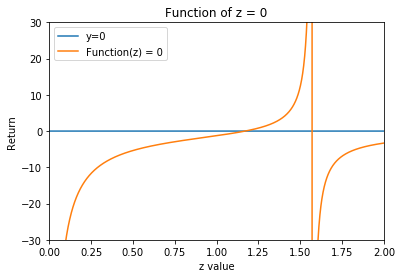

In [9]:
plt.title('Function of z = 0')
plt.xlabel('z value')
plt.ylabel('Return')
plt.plot(x_range,x_range*0, label='y=0')
plt.plot(x_range, returns,label='Function(z) = 0')
plt.ylim(-30, 30)
plt.xlim(0,2)
plt.legend()
plt.show()

We want to find the points at which y=0 and our function=0 overlap. These are our solutions for z. For this problem we look for one, we can choose any range in which to find a solution only changing th x_range values.


In [10]:
#Give algortihm range to look for solution in
solution = optimize.bisect(F, 1, 1.5) #with the help of adam! 
print("Solution = " + str(solution))

Solution = 1.17012095


We can repeat this for all ranges necessary.